<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [13]:
!pip install pandas

In [14]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [15]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-10 22:06:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.0MB/s    in 2.6s    

2025-07-10 22:06:16 (58.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [11]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



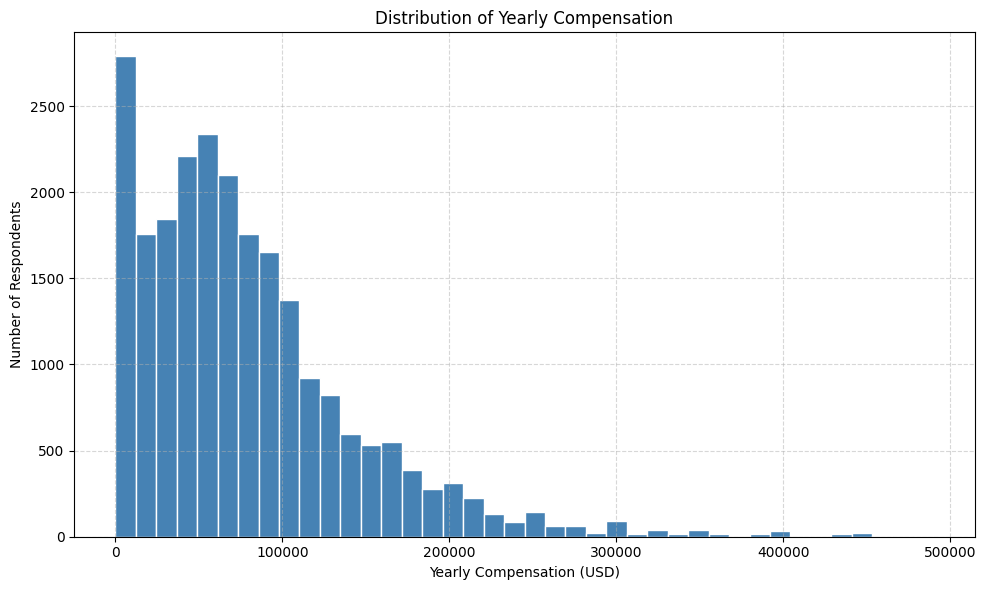

In [18]:
query = "SELECT ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Optional: remove extreme outliers (e.g., compensation > $500,000)
df = df[df["ConvertedCompYearly"] < 500000]
plt.figure(figsize=(10, 6))
plt.hist(df["ConvertedCompYearly"], bins=40, color="#4682b4", edgecolor="white")

plt.title("Distribution of Yearly Compensation")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [ ]:
## Write your code here

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



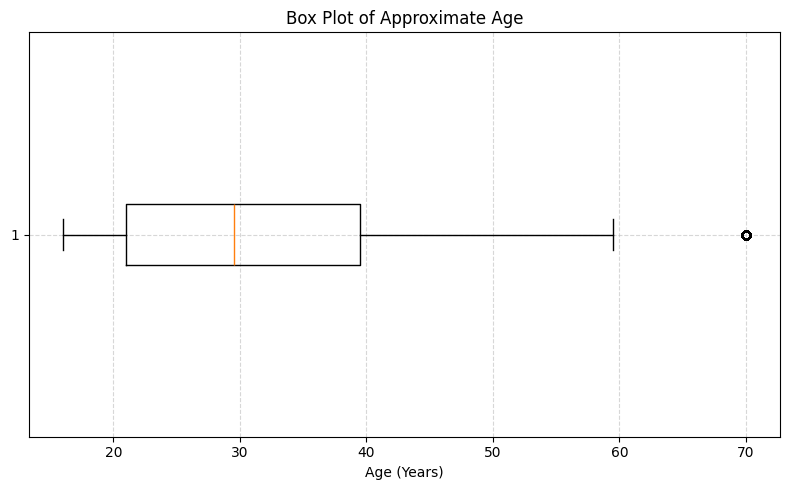

In [19]:
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df_age = pd.read_sql_query("SELECT Age FROM main WHERE Age != 'Prefer not to say'", conn)

# Map categories to numeric values
df_age["NumericAge"] = df_age["Age"].map(age_mapping)
plt.figure(figsize=(8, 5))
plt.boxplot(df_age["NumericAge"].dropna(), vert=False)

plt.title("Box Plot of Approximate Age")
plt.xlabel("Age (Years)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


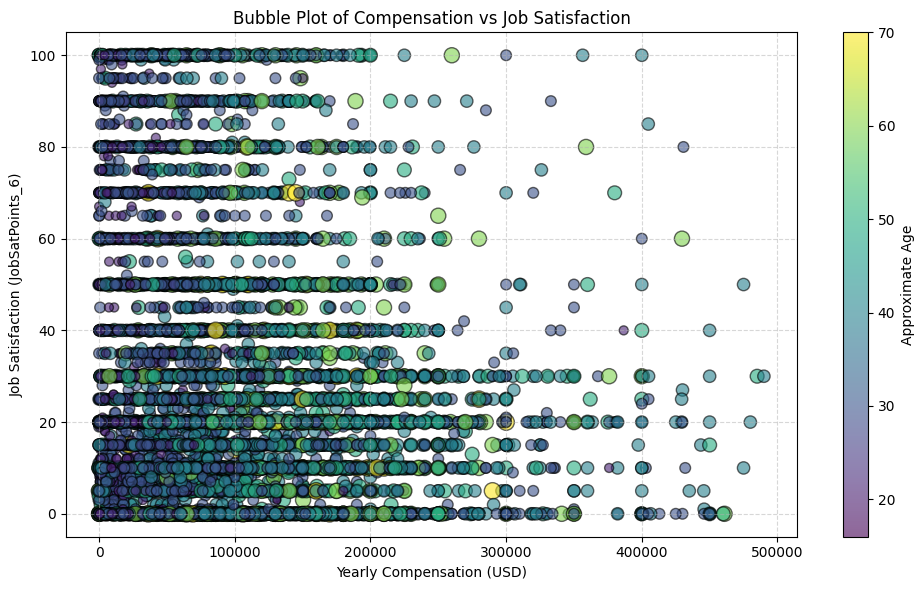

In [20]:
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
# Pull necessary fields
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6 
FROM main 
WHERE 
    Age IS NOT NULL AND 
    ConvertedCompYearly IS NOT NULL AND 
    JobSatPoints_6 IS NOT NULL AND 
    Age != 'Prefer not to say'
"""

df = pd.read_sql_query(query, conn)

# Map Age to numeric values
df["Age_numeric"] = df["Age"].map(age_mapping)

# Optional: filter out extreme compensation outliers
df = df[df["ConvertedCompYearly"] < 500000]
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["ConvertedCompYearly"],
    df["JobSatPoints_6"],
    s=df["Age_numeric"] * 2,  # Scale bubble size
    alpha=0.6,
    c=df["Age_numeric"],
    cmap="viridis",
    edgecolors="k"
)

plt.title("Bubble Plot of Compensation vs Job Satisfaction")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.colorbar(label="Approximate Age")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



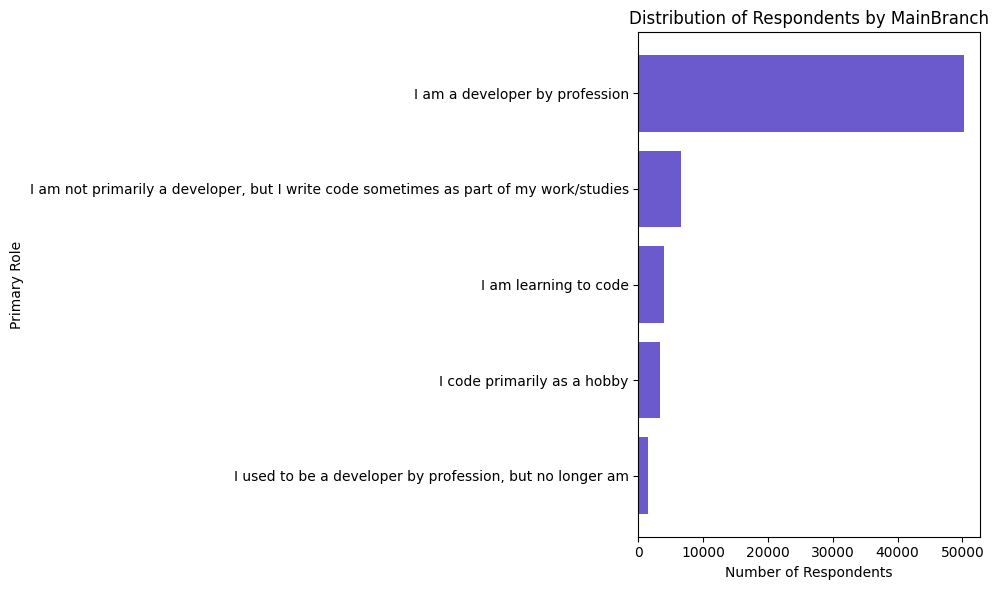

In [21]:
# Pull MainBranch data and count occurrences
query = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Count frequency of each role
branch_counts = df["MainBranch"].value_counts().reset_index()
branch_counts.columns = ["MainBranch", "Count"]

plt.figure(figsize=(10, 6))
plt.barh(branch_counts["MainBranch"], branch_counts["Count"], color="#6a5acd")

plt.title("Distribution of Respondents by MainBranch")
plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role")
plt.gca().invert_yaxis()  # Highest count on top
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



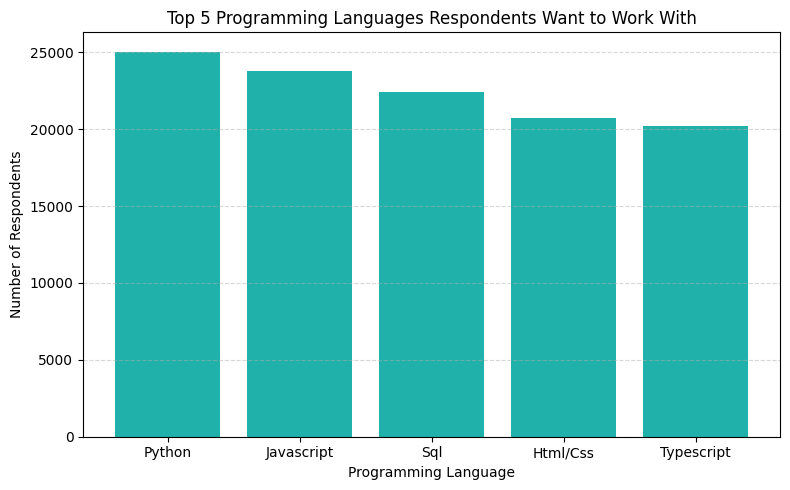

In [22]:
# Pull relevant data
df_lang = pd.read_sql_query("SELECT LanguageWantToWorkWith FROM main WHERE LanguageWantToWorkWith IS NOT NULL", conn)

# Split semicolon-delimited strings into individual rows
df_expanded = df_lang.assign(LanguageWantToWorkWith=df_lang["LanguageWantToWorkWith"].str.split(";")).explode("LanguageWantToWorkWith")

# Clean formatting
df_expanded["LanguageWantToWorkWith"] = df_expanded["LanguageWantToWorkWith"].str.strip().str.lower()
# Count occurrences of each language
language_counts = df_expanded["LanguageWantToWorkWith"].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
plt.bar(language_counts.index.str.title(), language_counts.values, color="#20b2aa")

plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


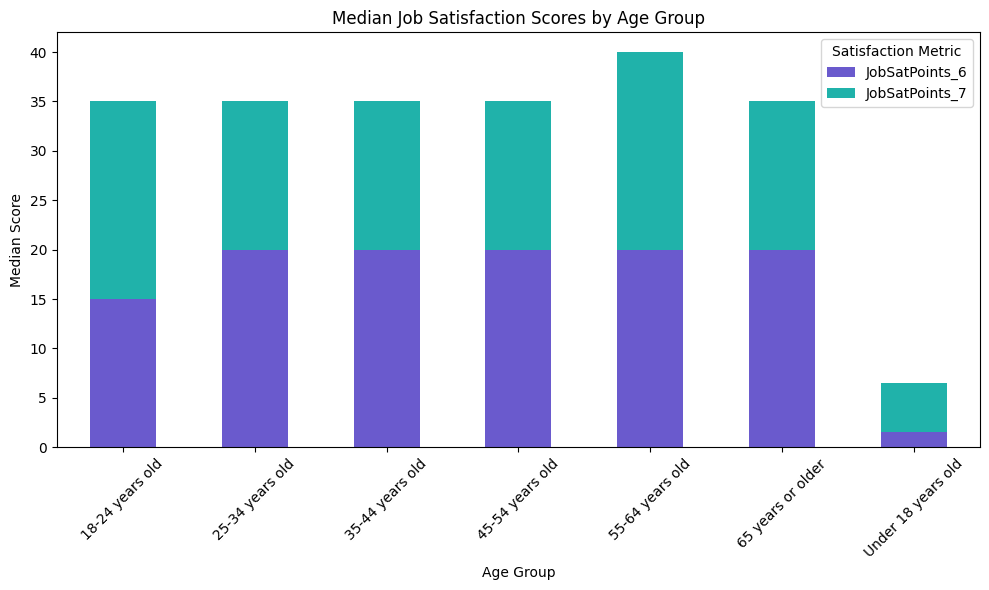

In [23]:
query = """WITH Cleaned AS (
    SELECT 
        Age,
        JobSatPoints_6,
        JobSatPoints_7
    FROM main
    WHERE 
        JobSatPoints_6 IS NOT NULL AND 
        JobSatPoints_7 IS NOT NULL AND 
        Age != 'Prefer not to say'
),
Ranked AS (
    SELECT 
        Age,
        JobSatPoints_6,
        JobSatPoints_7,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY JobSatPoints_6) AS rn6,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY JobSatPoints_7) AS rn7,
        COUNT(*) OVER (PARTITION BY Age) AS total
    FROM Cleaned
)
SELECT 
    Age,
    AVG(CASE WHEN rn6 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_6 END) AS Median_JobSatPoints_6,
    AVG(CASE WHEN rn7 IN ((total + 1) / 2, (total + 2) / 2) THEN JobSatPoints_7 END) AS Median_JobSatPoints_7
FROM Ranked
GROUP BY Age
ORDER BY Age;"""
df_medians = pd.read_sql_query(query, conn)
df_medians.set_index("Age", inplace=True)
df_medians.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#6a5acd", "#20b2aa"])

plt.title("Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Score")
plt.legend(["JobSatPoints_6", "JobSatPoints_7"], title="Satisfaction Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



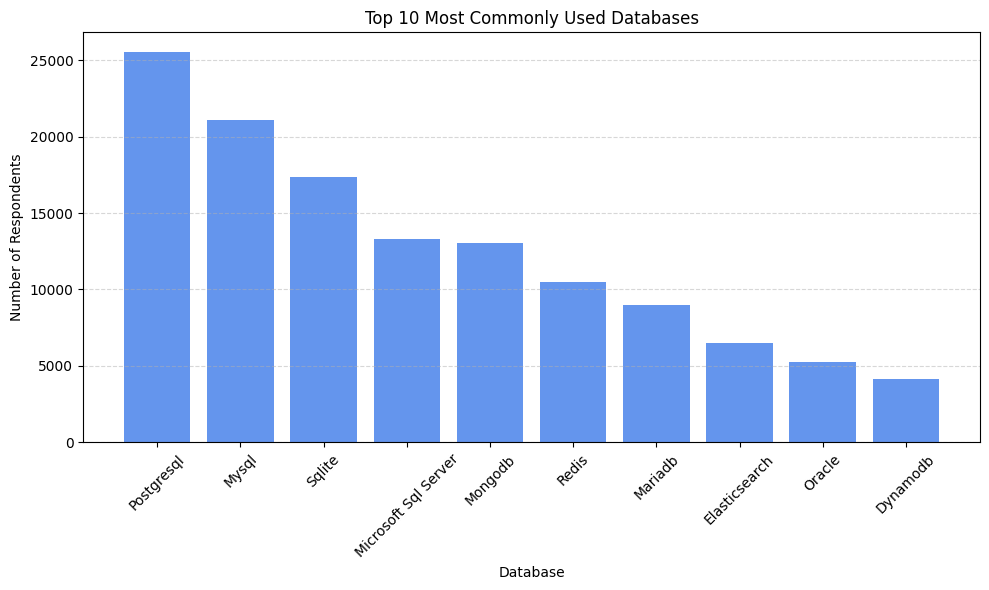

In [24]:
# Extract relevant field
df = pd.read_sql_query("SELECT DatabaseHaveWorkedWith FROM main WHERE DatabaseHaveWorkedWith IS NOT NULL", conn)

# Expand semicolon-separated values into individual rows
df_expanded = df.assign(DatabaseHaveWorkedWith=df["DatabaseHaveWorkedWith"].str.split(";")).explode("DatabaseHaveWorkedWith")

# Clean formatting
df_expanded["DatabaseHaveWorkedWith"] = df_expanded["DatabaseHaveWorkedWith"].str.strip().str.lower()
db_counts = df_expanded["DatabaseHaveWorkedWith"].value_counts().nlargest(10)  # Top 10 for clarity
plt.figure(figsize=(10, 6))
plt.bar(db_counts.index.str.title(), db_counts.values, color="#6495ed")

plt.title("Top 10 Most Commonly Used Databases")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



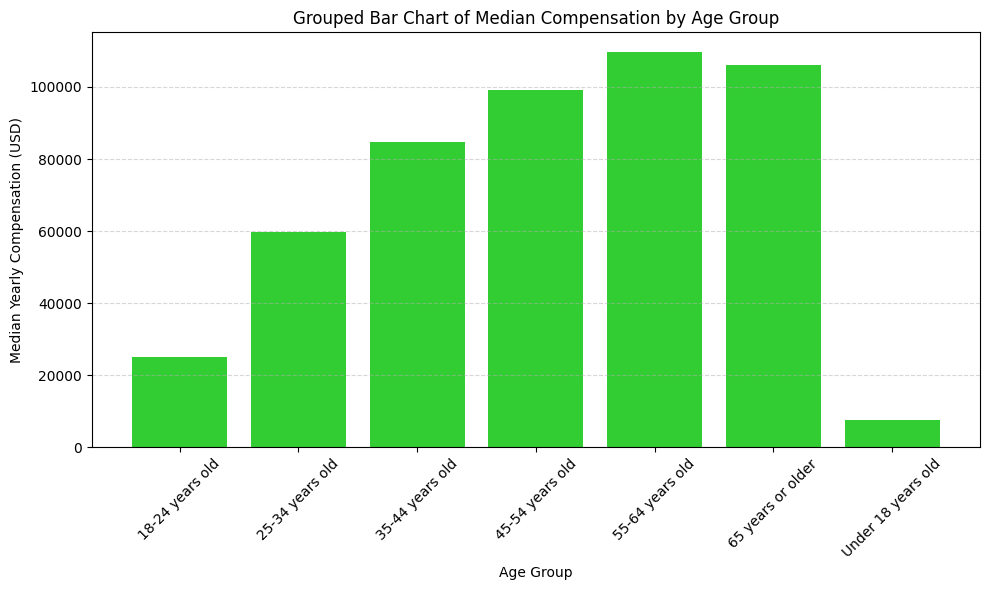

In [25]:
query = """WITH Cleaned AS (
    SELECT 
        Age,
        ConvertedCompYearly
    FROM main
    WHERE 
        Age IS NOT NULL AND 
        Age != 'Prefer not to say' AND
        ConvertedCompYearly IS NOT NULL
),
Ranked AS (
    SELECT 
        Age,
        ConvertedCompYearly,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY ConvertedCompYearly) AS rn,
        COUNT(*) OVER (PARTITION BY Age) AS total
    FROM Cleaned
)
SELECT 
    Age,
    AVG(CASE WHEN rn IN ((total + 1)/2, (total + 2)/2) THEN ConvertedCompYearly END) AS Median_Compensation
FROM Ranked
GROUP BY Age
ORDER BY Age;"""
df_comp = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 6))
plt.bar(df_comp["Age"], df_comp["Median_Compensation"], color="#32cd32")

plt.title("Grouped Bar Chart of Median Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



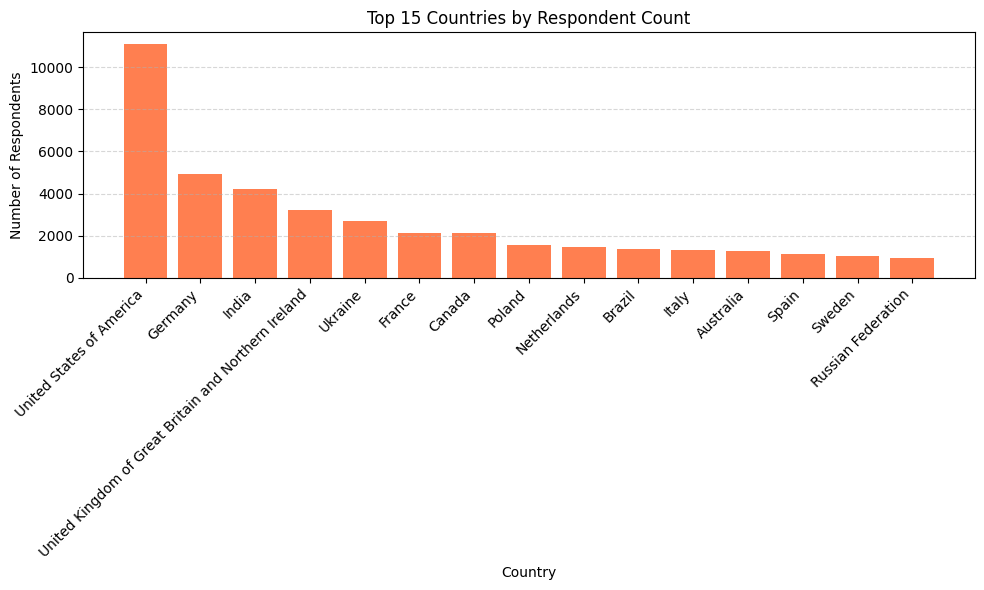

In [26]:
# Pull non-null countries
df_country = pd.read_sql_query("SELECT Country FROM main WHERE Country IS NOT NULL", conn)

# Count respondents by country
country_counts = df_country["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]
top_countries = country_counts.head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_countries["Country"], top_countries["Count"], color="#ff7f50")

plt.title("Top 15 Countries by Respondent Count")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
conn.closes()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
